# Общий практикум. Задача №338
## Бесконтактное определение проводимости

**Цель работы:** ознакомление с бесконтактным методом измерения электропроводимости вещества. Метод использует дифференциальный трансформатор как фазометрическое устройство для определения частотной зависимости фазового сдвига между переменным внешним магнитным полем и намагниченностью опбразца, помещённого в это поле. Удельная электрическая проводимость материала образца может быть найдена из этой зависимости.

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib import rcParams
rcParams['figure.dpi'] = 100

Построим искомую зависимость для диамагнетиков:

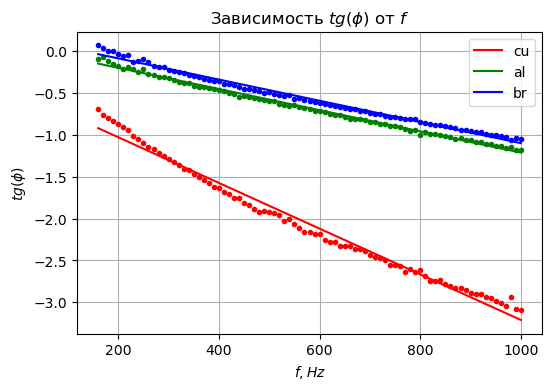

In [70]:
def MHK(X, Y):
    X = np.array(X)
    Y = np.array(Y)
    vopt, vcov = curve_fit(lambda x, A, B: A*x+B, X, Y)
    sv = np.sqrt(np.diag(vcov))
    return (vopt[0], vopt[1], sv[0], sv[1])


df = pd.read_csv('data4.txt', sep='\t').astype(float)

matdi = ['cu', 'al', 'br']
matfe = ['fe', 'pb', 'ti']
clrs = ['r', 'g', 'b']


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='both')
ax.set(
    title='Зависимость $tg(\phi)$ от $f$',
    ylabel='$tg(\phi)$',
    xlabel='$f, Hz$')

n = 85
cl = 0
pr = []
spr = []
for m in matdi:
    x = df['Hz'+m].tail(n).values
    y = np.tan(df['deg'+m].tail(n).values/180.*3.1416)
    plt.plot(x, y, '.', color=clrs[cl])
    plt.plot(x, MHK(x, y)[0]*x+MHK(x, y)[1],  '-', color=clrs[cl], label=m)
    pr.append(MHK(x, y)[0])
    spr.append(MHK(x, y)[2])
    cl += 1
ax.legend()

plt.show()

Построим искомую зависимость для феррамагнетиков:

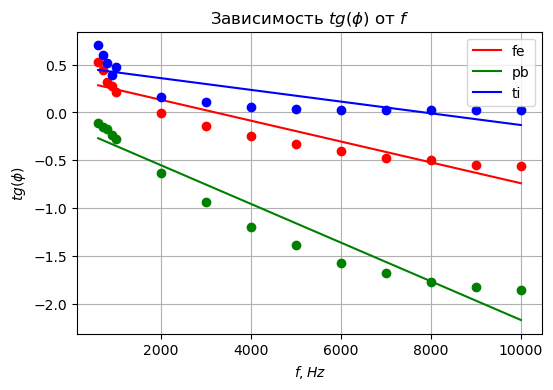

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='both')
ax.set(
    title='Зависимость $tg(\phi)$ от $f$',
    ylabel='$tg(\phi)$',
    xlabel='$f, Hz$')

n = 14
cl = 0

for m in matfe:

    x = df['Hz'+m].head(19).tail(n).values
    y = np.tan(df['deg'+m].head(19).tail(n).values/180.*3.1416)
    plt.plot(x, y, 'o', color=clrs[cl])
    plt.plot(x, MHK(x, y)[0]*x+MHK(x, y)[1],  '-', color=clrs[cl], label=m)
    pr.append(MHK(x, y)[0])
    spr.append(MHK(x, y)[2])
    cl += 1
ax.legend()
plt.show()


Найдём толщину скин слоя:

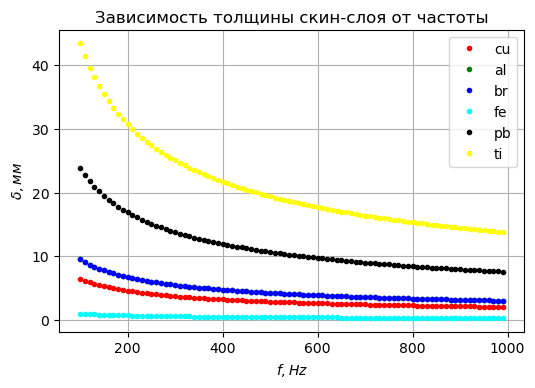

In [72]:
spr = np.abs(np.array(spr)/np.array(pr))


for t in range(1, len(pr)):
    pr[t] *= 60/pr[0]
pr[0] = 60

fr = np.arange(100, 1000, 10)
mus = [1, 1, 1, 1000, 1, 1]


def skin(f, si, mu):
    return 1/(np.sqrt(3.1416*f*4*3.1416e-7*si*mu))


clrs += ['cyan', 'black', 'yellow']
cl = 0

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.grid(axis='both')
ax.set(
    title='Зависимость толщины скин-слоя от частоты',
    ylabel='$\delta , мм$',
    xlabel='$f, Hz$')


for i in range(6):
    sk = skin(fr, pr[i]*1e6, mus[i])
    plt.plot(fr, 1e3*sk, '.', color=clrs[cl], label=(matdi+matfe)[i])
    cl += 1
ax.legend()

plt.show()
